# Общие выводы
**Частота использования различных типов устройств** показывает, что чаще пользователи заходят с телефона, так что нам особенно важно сделать дружелюбный дизайн для мобильной версии сайта

**Общая конверсия** в покупку = 1.29%. В целом конверсия 1-2% процента для сайтов с афишами является нормальной, хотелось бы значение ближе к 2%.

**Конверсии между этапами** показали, что люди часто уходят перед набором номера. Это может быть связано с тем, что люди тщательно выбирают места, выходят из платформы, чтобы посоветоваться с друзьями, тем самым прерывая свою попытку покупки.  
Так же возможно один человек покупает билеты на всю компанию, а места для выбора смотрят все, т.е. из попытки покупки в успешную покупку переходит всего один человек из компании.

**Воронки продаж по категориям** показали заинтересованность пользователей, заходивших на сайт, по категориями, отсюда мы можем сделать вывод о порядке отображения категорий на сайте, для большей заинтересованности пользователей:  
`Концерты, театры, детям, городское событие, Экскурсии и туры, вечеринки, музеи и галереи, обучение, мастер-классы, стендап, кино`

**Конверсии по категориям** на графике представлены конверсии из перехода к объявлению до покупки, отсюда мы можем понять, какие мероприятия чаще приводят к покупке. Исходя из покупок, мы не можем однозначно судить о заинтересованности пользователя в той или иной категории, т.к. на афише есть бесплатные мероприятия, не требующие даже регистрации, конверсии взаимодействия с данными мероприятиями можно отследить только по лайкам и добавлению в избраннное (таких исторических данных у нас нет).  
Подробная информация о **соотношении бесплатных и платных** мероприятий также представлена на графике 

**Конверсии взаимодействия пользователя с частями главной страницы**  
P.s.: в дальнейших выводах нет ни слова про блок "Подборка событий", т.к. данные об этом блоке представленны неккоректно

**Конверсия в просмотр блоков на главной странице** позволяет нам увидеть, какой процент пользователей долистывает до каждого из блоков на главной странице. Мы можем обратить внимание на то, что в десктопной версии конверсии просмотра больше, это связано с тем, что на экране компьютера можно больше всего увидеть сразу. Поэтому наша цель скомпоновать все для привлечения внимания к различным категориям в мобильной версии.

**Конверсия в действие на главной странице**
Блоки которые необходимы на сайте (пользуются спросом у пользователя, имеют конверсии больше средней): категории, 
в мобильной версии по блоку с ближайшими данными кликают немного чаще, чем по календарю, поэтому имеет место комбинированный календарь (выбор двух недель/трех недель без перехода в календарь и кнопка перехода в календарь с выбором двух месяцев вперед), 
главный логотип,
название организаций на событии с сылкой на них,
кнопка для перехода в личный кабинет,
кнопка на событии для добавления его в избранное,
кнопка для просмотра избранного,
кнопка для просмотра купленных билетов

**Относительные конверсии по блокам**  
В мобильном приложении намного меньше пользователей после нажатия на кнопку "Выбрать дату" не нажимали на кнопку "Искать события", это значит, что они выбирали ближайшие дни и уже для них смотрели события, что подтверждает идею ввода комбинированного календаря без дополнительных кнопок


# Основные рекоменадции по дизайну
Порядок категорий: Концерты, Впечатления, Театры, Детям, Городское событие, Эекскурсии и туры, Спорт, Вечеринки, Музеи и галереи, Обучение, Мастер-классы, Стендап, Кино(редирект на vl.ru кино)  
Календарь: в развернутом виде на несколько недель(кнопка для его расширения), можно будет потом отслеживать статисктику по использованию этой кнопки и если она не будет пользоваться спросом, то убрать


# Визуализация

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt 
con = sqlite3.connect("dump.db")
cur = con.cursor()
MainPage = pd.read_sql("select * from MainPage", con)
UserPath = pd.read_sql("select * from UserPath", con)
Event_to_Category = pd.read_sql("select * from Event_to_Category", con)
show = sum(UserPath.Act == 'EventShow')
prebuy = sum(UserPath.Act == 'EventPreBuy')
contact = sum(UserPath.Act == 'BuyWithContact')
purchase = sum(UserPath.Act == 'SuccessPurchase')

## Частота использования различных типов устройств для входа на сайт

Text(0, 0.5, 'чел, млн')

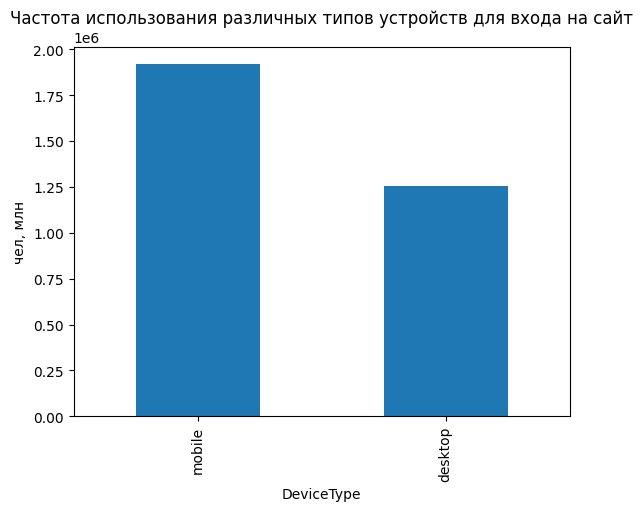

In [84]:
MainPage.DeviceType.value_counts().plot(kind='bar')
plt.title('Частота использования различных типов устройств для входа на сайт')
plt.ylabel('чел, млн')

# Количество посещений в день

In [1]:
MainPage.UserID.nunique()

NameError: name 'MainPage' is not defined

<Axes: xlabel='Day'>

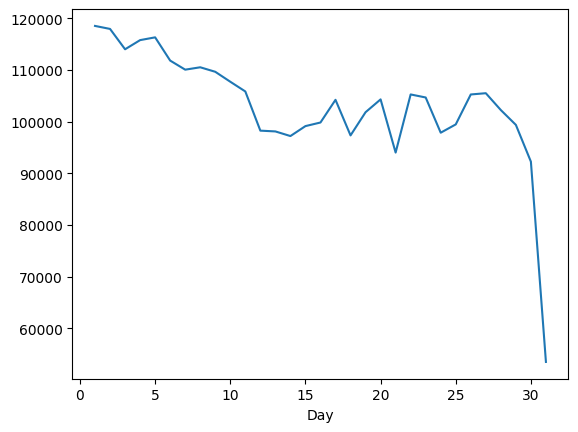

In [3]:
MainPage.Time = pd.to_datetime(MainPage.Time)
MainPage['Day'] = MainPage['Time'].dt.day
MainPage.groupby('Day').UserID.count().plot()

In [ ]:
MainPage.Time = pd.to_datetime(MainPage.Time)
MainPage['Day'] = MainPage['Time'].dt.day
MainPage.groupby('Day').UserID.count().plot()

### Общая конверсия

In [3]:
round((purchase/show) * 100, 2)

1.29

### Воронка продаж
`EventShow` - Пользователь посетил событие  
`EventPreBuy` - Пользователь попытался купить билет  
`BuyWithContact` - Пользователь Начал ввод телефона  
`SuccessPurchase` - Пользователь успешно купил билет

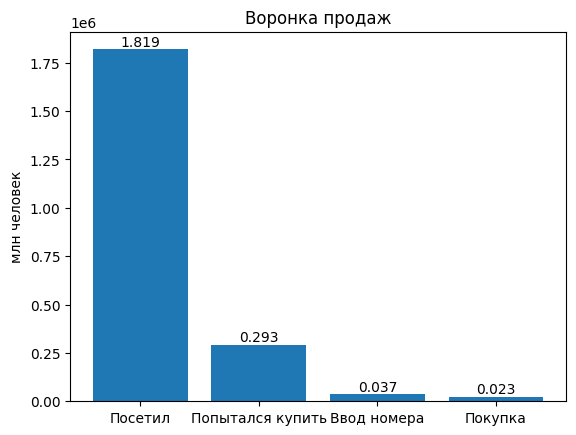

In [4]:
bars = plt.bar(['Посетил', 'Попытался купить', 'Ввод номера', 'Покупка'], [show, prebuy, contact, purchase])
for bar in bars:
    yval = round((bar.get_height())/10e5, 3)  # Получаем высоту бара
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), yval, ha='center', va='bottom')
plt.title('Воронка продаж')
plt.ylabel('млн человек');

### Конверсии между этапами

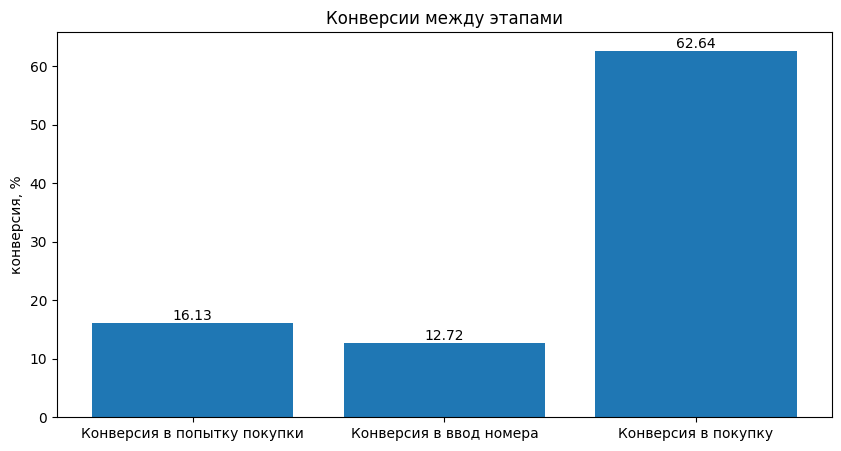

In [5]:
StoPreB = (prebuy/show) * 100 
PreBtoC = (contact/prebuy) * 100 
CtoP = (purchase/contact) * 100
plt.figure (figsize=(10, 5))
bars = plt.bar(['Конверсия в попытку покупки', 'Конверсия в ввод номера', 'Конверсия в покупку'], [StoPreB, PreBtoC, CtoP])
for bar in bars:
    yval = round(bar.get_height(), 2)  # Получаем высоту бара
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

plt.ylabel('конверсия, %')
plt.title('Конверсии между этапами');

### Воронки продаж в разных категориях

In [6]:
# Event_to_Category.drop('index', axis=1, inplace=True)
Event_to_Category.Categories = Event_to_Category.Categories.apply(lambda x : 'Детям' if 'Детям' in x else x)
Event_to_Category['Categories'] = Event_to_Category['Categories'].str.split(';')
Event_to_Category = Event_to_Category.explode('Categories')
right_caty = ['Концерты', 'Театры', 'Детям', 'Стендап', 'Спорт',
              'Городское событие', 'Музеи и галереи', 'Кино', 'Впечатления',
              'Экскурсии и туры', 'Вечеринки', 'Мастер-классы', 'Обучение']
Event_to_Category = Event_to_Category[Event_to_Category.Categories.isin(right_caty)]

df = UserPath.merge(Event_to_Category, how='inner', on='EventID')


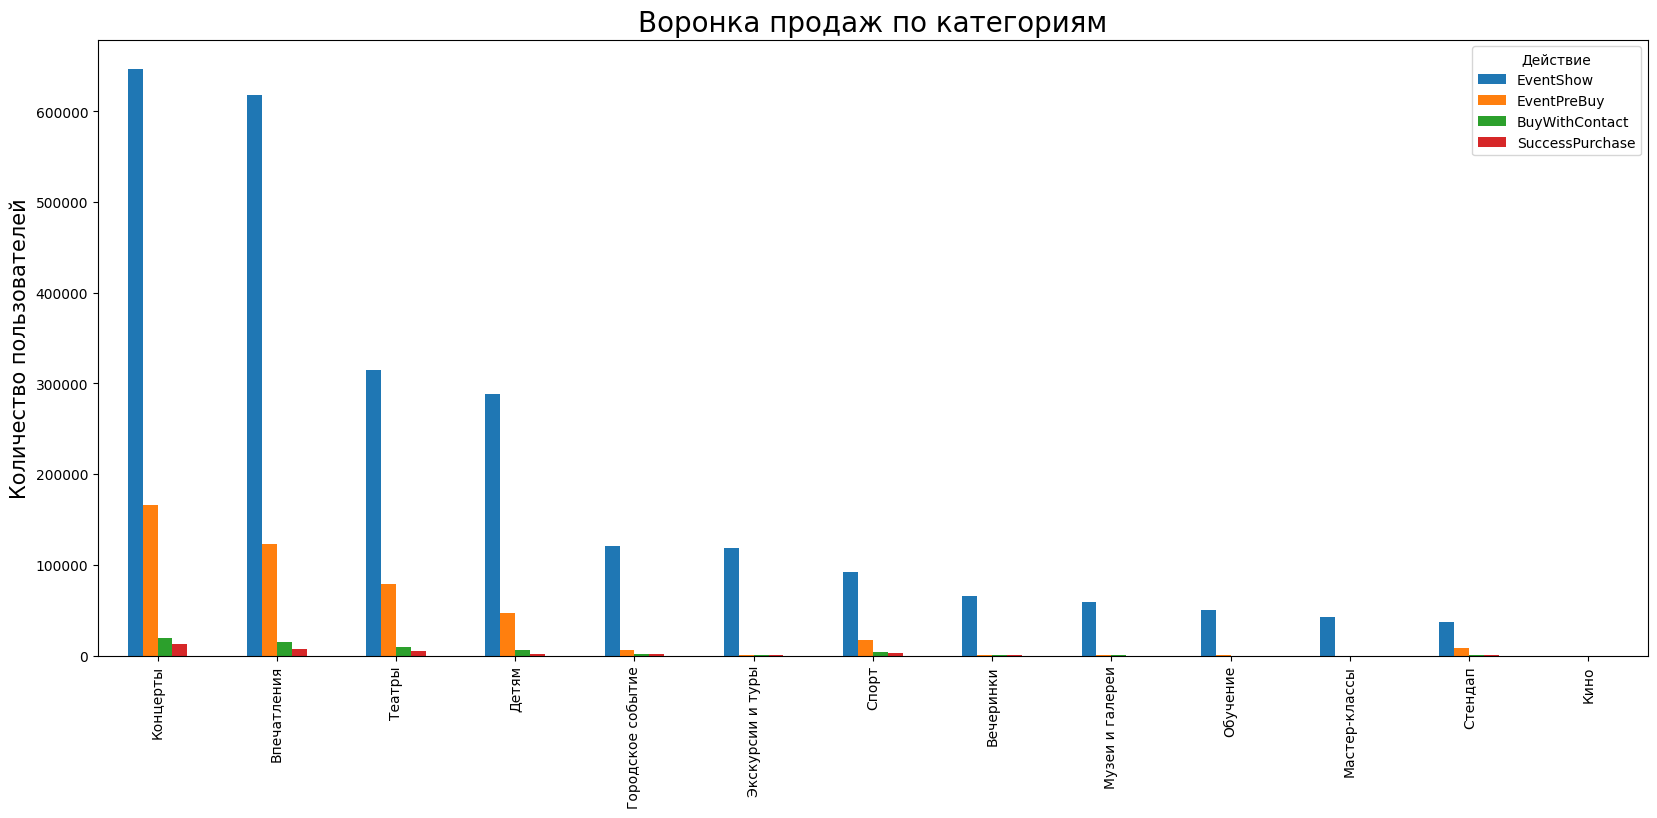

In [7]:
funnel_data = pd.DataFrame(index=right_caty)
actions = ['EventShow', 'EventPreBuy', 'BuyWithContact', 'SuccessPurchase']
for act in actions:
    act_data = df[df.Act == act]
    counts = act_data.Categories.value_counts().reindex(right_caty, fill_value=0)
    funnel_data[act] = (counts).sort_values()

funnel_data = funnel_data.sort_values(by=['EventShow'], ascending=False)
funnel_data.plot(kind='bar', figsize=(20, 8))
plt.title('Воронка продаж по категориям', fontdict={'fontsize':20})
plt.ylabel('Количество пользователей', fontdict={'fontsize':15})
# plt.xticks(rotation=)
plt.legend(title='Действие')
plt.show();

### Конверсии по категориям

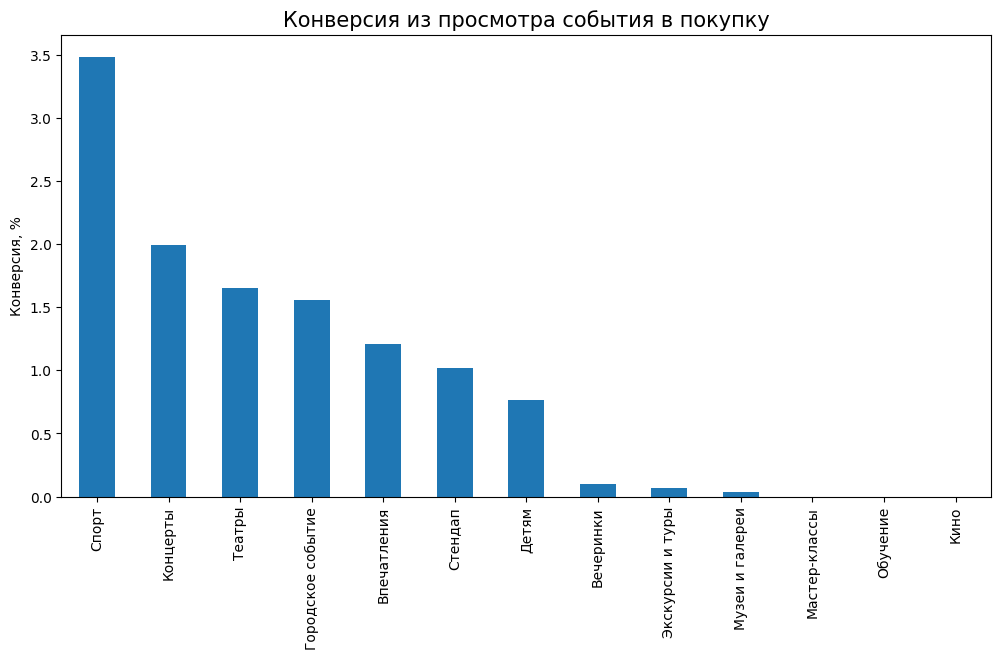

In [8]:
Show_Purchase = pd.DataFrame(index=right_caty)
for act in actions:
    act_data = df[df.Act == act]
    counts = act_data.Categories.value_counts().reindex(right_caty, fill_value=0)
    Show_Purchase[act] = (counts).sort_values()

Show_Purchase['cr'] = (Show_Purchase.SuccessPurchase/Show_Purchase.EventShow)*100
plt.figure(figsize=(12, 6)) 
Show_Purchase.cr.sort_values(ascending=False).plot(kind='bar')
plt.title('Конверсия из просмотра события в покупку', fontdict={'fontsize':15})
plt.ylabel('Конверсия, %')
plt.show()

<Figure size 1200x600 with 0 Axes>

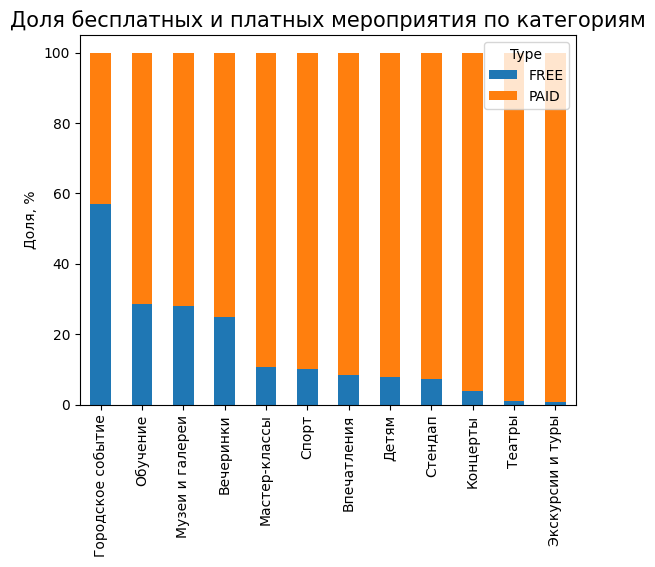

In [9]:
plt.figure(figsize=(12, 6)) 
grouped = df.groupby(['Categories', 'Type']).size().unstack(fill_value=0)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
percentages.sort_values(by='FREE', ascending=False).plot(kind='bar', stacked=True)

plt.title('Доля бесплатных и платных мероприятия по категориям', fontdict={'fontsize':15})
plt.ylabel('Доля, %')
plt.xlabel('')
plt.show()

## Конверсии взаимодействия пользователя с частями главной страницы

### Конверсия в просмотр блоков на главной странице
`TopEventShow` - доля пользователей, которые увидели блок "Популярные в последнее время события"  
`NewsletterShow` - доля пользователей, которые увидели блок рассылок  
`MainEventShow` - доля пользователей, которые увидели блок "Новинки Афиши"  
`ExpectedEventShow` - доля пользователей, которые увидели блок "Самые ожидаемые"  
`KinoShow` - доля пользователей, которые увидели блок "Кино"  
`AdditionalInfoShow` - доля пользователей, которые увидели футер

процент nan в данных = 0.0


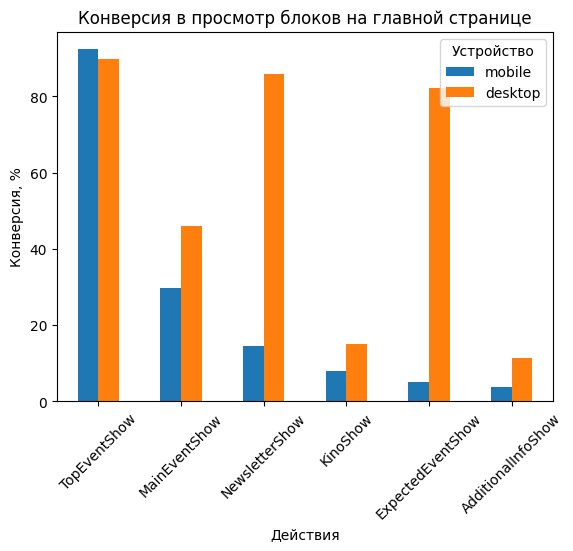

In [49]:
print(f'процент nan в данных = {sum(MainPage.Act.isna())/MainPage.shape[0]}') # nun мало, так что мы можем их удалить
MainPage = MainPage[(MainPage.Act.notna()) & (MainPage.Act != "")]

cr_show = pd.DataFrame()
LoadPageShow_show = ['AdditionalInfoShow', 'ExpectedEventShow', 'MainEventShow', 'TopEventShow', 'KinoShow', 'NewsletterShow']
devices = MainPage.DeviceType.unique()
for cat in LoadPageShow_show:
    for device in devices:
        filtered_data = MainPage[MainPage['DeviceType'] == device]
        
        proportion = (filtered_data['Act'] == cat).sum() / (filtered_data['Act'] == 'LoadPage').sum()
        
        cr_show.loc[cat, device] = proportion * 100 
cr_show = cr_show.sort_values(by='mobile', ascending=False)
cr_show.plot(kind='bar')
plt.title('Конверсия в просмотр блоков на главной странице')
plt.ylabel('Конверсия, %')
plt.xlabel('Действия')
plt.xticks(rotation=45)
plt.legend(title='Устройство')
plt.show()

### Конверсия в действия на главной странице

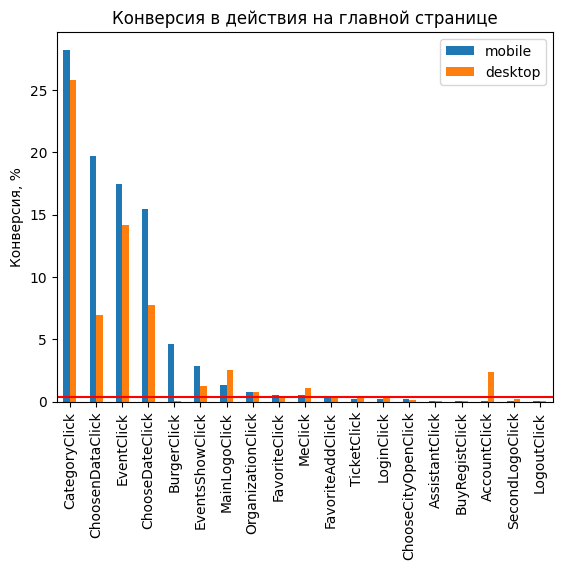

In [82]:
cr_load = pd.DataFrame()
LoadPageShow = ['AccountClick', 'SecondLogoClick', 'LoginClick', 'EventsShowClick', 'ChooseCityOpenClick', 'ChooseDateClick', 'FavoriteClick', 'MainLogoClick', 'CategoryClick', 'BurgerClick', 'ChoosenDataClick', 'AssistantClick',
                'OrganizationClick', 'EventClick', 'FavoriteAddClick',  'BuyRegistClick', 'MeClick', 'TicketClick', 'LogoutClick']
for cat in LoadPageShow:
    for device in devices:
        filtered_data = MainPage[MainPage['DeviceType'] == device]
        proportion = ((filtered_data['Act'] == cat)).sum() / (filtered_data['Act'] == 'LoadPage').sum()
        cr_load.loc[cat, device] = proportion*100

cr_load.sort_values(by = 'mobile', ascending=False).plot(kind='bar')
plt.title('Конверсия в действия на главной странице')
plt.ylabel('Конверсия, %')
plt.axhline(0.4, c = 'r')
plt.show()

In [81]:
cr_load.describe()

,mobile,desktop
count,19.000000,19.000000
mean,4.863286,3.387219
std,8.535978,6.540783
min,0.006970,0.014780
25%,0.122437,0.198303
50%,0.505777,0.404982
75%,3.736290,2.415604
max,28.234288,25.756262


### Конверсии в блоке "Популярное"

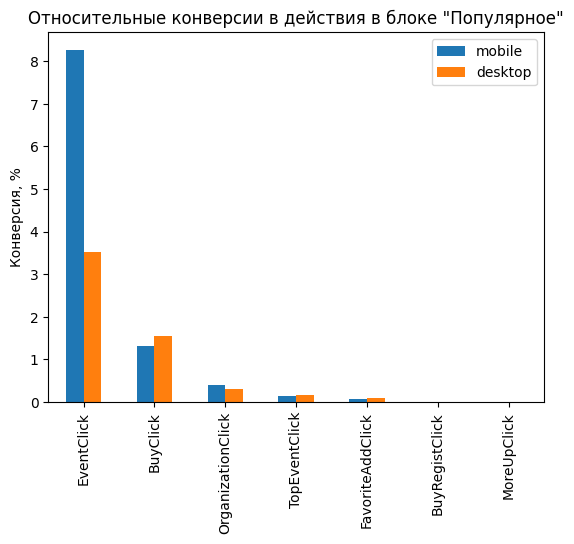

In [58]:
cr_pop = pd.DataFrame()

TopShowFilter = ['BuyRegistClick', 'MoreUpClick', 'FavoriteAddClick', 'EventClick', 'BuyClick', 'OrganizationClick'] 
TopShow = ['TopEventClick', 'MoreUpClick']

for cat in TopShow:
    for device in devices:
        filtered_data = MainPage[MainPage['DeviceType'] == device]
        proportion = ((filtered_data['Act'] == cat)).sum() / (filtered_data['Act'] == 'TopEventShow').sum()
        cr_pop.loc[cat, device] = proportion*100

for cat in TopShowFilter:
    for device in devices:
        filtered_data = MainPage[MainPage['DeviceType'] == device]
        proportion = ((filtered_data['Act'] == cat) & (filtered_data.Block == 'Популярные в последнее время события')).sum() / (filtered_data['Act'] == 'TopEventShow').sum()
        cr_pop.loc[cat, device] = proportion*100

cr_pop.sort_values(by = 'mobile', ascending=False).plot(kind='bar')
plt.title('Относительные конверсии в действия в блоке "Популярное"')
plt.ylabel('Конверсия, %')
plt.show()

In [57]:
cr_pop

,"(TopEventClick, mobile)","(TopEventClick, desktop)","(MoreUpClick, mobile)","(MoreUpClick, desktop)","(BuyRegistClick, mobile)","(BuyRegistClick, desktop)","(FavoriteAddClick, mobile)","(FavoriteAddClick, desktop)","(EventClick, mobile)","(EventClick, desktop)","(BuyClick, mobile)","(BuyClick, desktop)","(OrganizationClick, mobile)","(OrganizationClick, desktop)"


### Конверсии в блоке "Ближайшие"

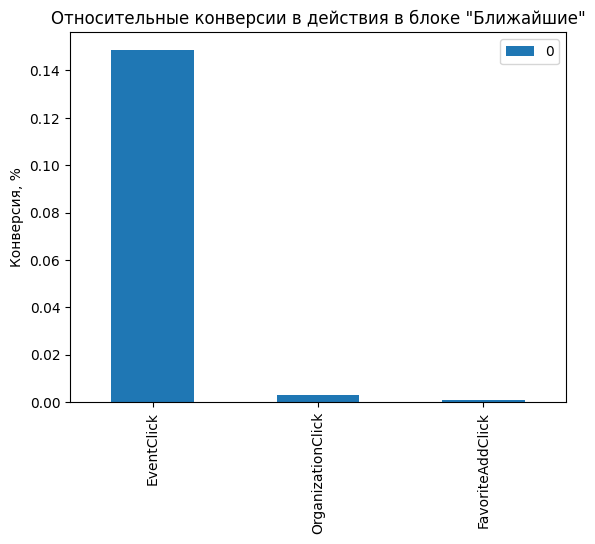

In [16]:
NearShow = ['FavoriteAddClick', 'EventClick', 'OrganizationClick']
cr_near = pd.DataFrame()
for cat in NearShow:
    proportion = ((MainPage['Act'] == cat) & (MainPage.Block == 'В ближайшее время')).sum() / (MainPage['Act'] == 'ChoosenDataClick').sum()
    cr_near[cat] = [proportion*100]

cr_near.T.sort_values(by = 0, ascending=False).plot(kind='bar')
plt.title('Относительные конверсии в действия в блоке "Ближайшие"')
plt.ylabel('Конверсия, %')
plt.show()

### Конверсии в блоке "Ожидаемые"

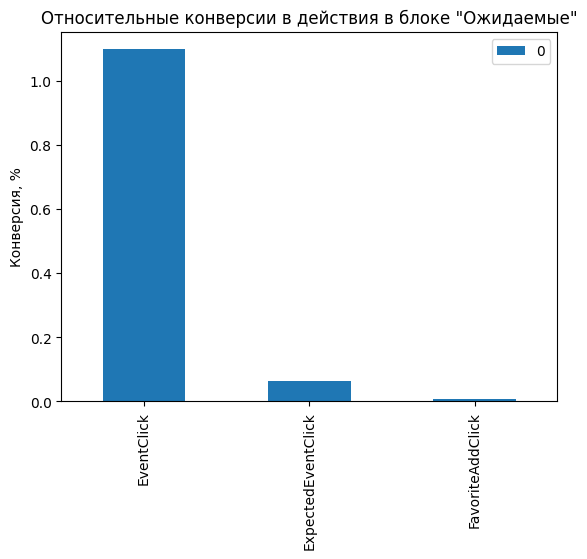

In [17]:
ExpectedShowFilter = ['FavoriteAddClick', 'EventClick']
ExpectedShow = ['ExpectedEventClick']
cr_expect = pd.DataFrame()
for cat in ExpectedShowFilter:
    proportion = ((MainPage['Act'] == cat) & (MainPage.Block == 'Самые ожидаемые')).sum() / (MainPage['Act'] == 'ExpectedEventShow').sum()
    cr_expect[cat] = [proportion*100]

cr_expect['ExpectedEventClick'] = [((MainPage['Act'] == 'ExpectedEventClick').sum() / (MainPage['Act'] == 'ExpectedEventShow').sum())* 100]

cr_expect.T.sort_values(by = 0, ascending=False).plot(kind='bar')
plt.title('Относительные конверсии в действия в блоке "Ожидаемые"')
plt.ylabel('Конверсия, %')
plt.show()

### Относительные конверсии в действия на главной странице

In [78]:
BurgerClickCR = ['MeClick', 'TicketClick', 'LogoutClick'] 
Show_Click = ['Newsletter', 'GoToTop', 'Kino']
ChooseCityClickCR = ['ChooseCityClick']
MainShow = ['MoreDownClick']
ChooseDateClickCR = ['DataFilterApplyClick']
EventClickCR = ['BuyClick'] 
Additional = ['AdditionalInfoClick', 'SupportMailClick']
cr = pd.DataFrame()
# for cat in BurgerClickCR:
#     for device in devices:
#         filtered_data = MainPage[MainPage['DeviceType'] == device]
#         proportion = (filtered_data['Act'] == cat).sum() / (filtered_data['Act'] == 'BurgerClick').sum()
#         cr.loc[cat, device] = proportion*100
for device in devices:
    filtered_data = MainPage[MainPage['DeviceType'] == device]
    cr.loc['ChooseCityClick', device] = ((filtered_data['Act'] == 'ChooseCityClick').sum() / (filtered_data['Act'] == 'ChooseCityClick').sum())*100
    cr.loc['MoreDownClick', device] = ((filtered_data['Act'] == 'MoreDownClick').sum() / (filtered_data['Act'] == 'MainEventShow').sum())*100
    cr.loc['DataFilterApplyClick', device] = ((filtered_data['Act'] == 'DataFilterApplyClick').sum() / (filtered_data['Act'] == 'ChooseDateClick').sum())*100

    cr.loc['BuyClick', device] = ((filtered_data['Act'] == 'BuyClick').sum() / (filtered_data['Act'] == 'EventClick').sum())*100

for cat in Additional:
    for device in devices:
        filtered_data = MainPage[MainPage['DeviceType'] == device]
        proportion = ((filtered_data['Act'] == cat) & (filtered_data['Block'] == "")).sum() / (filtered_data['Act'] == 'AdditionalInfoShow').sum()
        cr.loc[cat, device] = proportion*100

for cat in Show_Click:
    for device in devices:
        filtered_data = MainPage[MainPage['DeviceType'] == device]
        proportion = (filtered_data['Act'] == cat+'Click').sum() / (filtered_data['Act'] == cat+'Show').sum()
        cr.loc[cat+'Click', device] = proportion*100

`ChooseCityClick` -  доля пользователей, которые кликнули по городу в списке городов из тех, кто открыл этот список  
`DataFilterApplyClick` - доля пользователей, которые кликнули по кнопке "Искать события" в блоке "Выбора даты" из тех, кто кликнул на этот блок "Выбора даты"  
`BuyClick` - доля пользователей, которые кликнули "Купить" из тех, кто кликнул на событие  
`MoreDownClick` - доля пользователей, которые кликнули на "Показать еще" внизу страницы (показать еще блок "Новинки") из тех, кто увидел блок "Новинки"   
`KinoClick` - доля пользователей, которые кликали внутри блока "Кино" из тех, кто увидел блок "Кино"  
`GoToTopClick` - доля пользователей, которые нажали на кнопку возврата наверх из тех, кто ее увидел  
`AdditionalInfoClick` - доля пользователей, которые кликнули по ссылке в футере из тех, кто увидел футер  
`NewsletterClick` - доля пользователей, которые кликнули в блоке рассылок из тех, кто увидел блок рассылок  
`SupportMailClick` - доля пользователей, которые кликнули по почте для обратной связи в футере из тех, кто увидел футер

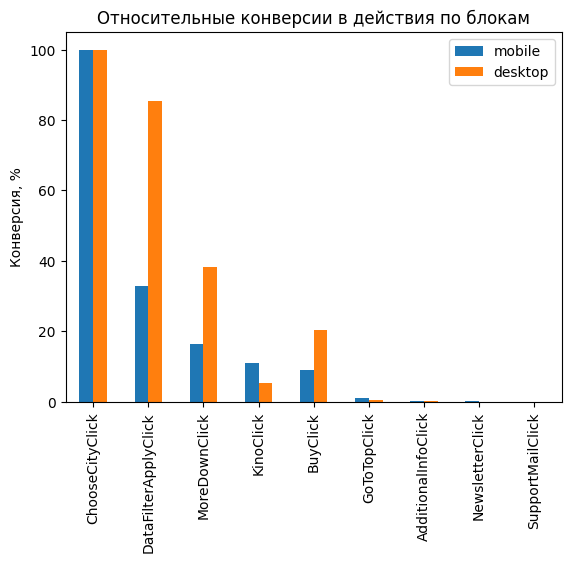

In [79]:
cr.sort_values(by = 'mobile', ascending=False).plot(kind='bar')
plt.title('Относительные конверсии в действие по блокам')
plt.ylabel('Конверсия, %')
plt.show()